# Predicting the value of a house in King County, Washington

***

![House](king_county_skyline.jpg)

***

### Objectives
* Analyse what variables have the biggest impact in predicting price.  
* What are the tips we can provide for current homeowners that want to sell their home



# Approach (plan of action)

* Data mining
    * Import Libraries
    * Import Functions
    * Import the Data
        * Defining variables
* Clean the Data
    * Looking at NaN, missing values, extraneous values
    * Converting datatypes
    * Dummy variables
    * Distribution of data
        * Transformation (to deal with non-normality and linearity violations), standardization (scale?)
* Explore the Data
    * Use of visuals such as heatmaps, scatterplots, etc. to identify hypotheses we want to test in our model 
        * Heatmap
            * Refined heatmap
            * Based on correlations, consider use of control variables in our model (e.g., zipcode) to help capture noise in our model
* Feature Engineering
    * Select important features
* Predictive Modeling
    * Multiple Linear Regression
    * Train/Test
    * Evaluate performance
* Data Visualization
    * Display key findings to stakeholders
        * Layman terms for what a change in each variable does
        * Plots & data visualization


# Data Mining

## - Library Importing

In [31]:
import numpy as np #for linear algebra
import pandas as pd #Importing and manipulating DataFrames
from pandas.tools.plotting import scatter_matrix # data processing, scatter matrix 

import matplotlib.pyplot as plt #For basic plotting
%matplotlib inline
import seaborn as sns #For more advanced/neater-looking plotting
import statsmodels.api as sm #For statistical tests and exploration
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## - Functions Importing

In [96]:
#Plotting
def plot_hist(x_variable, df):
    print("Skewness: %f" % df[x_variable].skew())
    print("Kurtosis: %f" % df[x_variable].kurt())
    sns.set(rc={'figure.figsize':(12,6)})
    sns.distplot(df[x_variable], bins=100);

def plot_scatter(x_variable, df):
    sns.lmplot(x=x_variable, y="price", data=df);
    
def plot_bar(x_variable, df):
    print("Skewness: %f" % df[x_variable].skew())
    print("Kurtosis: %f" % df[x_variable].kurt())
    sns.barplot(x=x_variable, y='price', data=df);
    
def plot_count(x_variable, df):
    sns.countplot(x=x_variable, data=df)

Skewness: 0.620268
Kurtosis: -0.335502


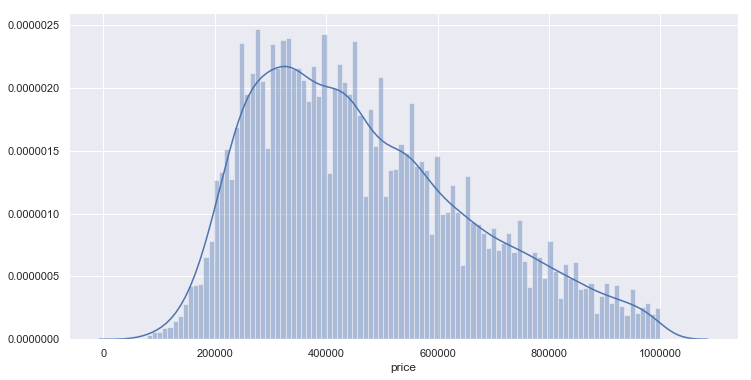

In [98]:
plot_hist('price', df_cleaned)

## - Data Importing

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-dc-ds-career-042219/master/kc_house_data.csv')

# Viewing the Data

In [4]:
df.shape

(21597, 21)

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### - Defining our Variables
    * id = House's unique identification
    * date = Day that house was sold
    * price = Price at which house was sold
    * bedrooms = Number of bedrooms in the house
    * bathrooms = Number of bathrooms in the house
    * sqft_living = Size of the interior of the house (in square feet)
    * sqft_lot = Size of the lot (in square feet)
    * floors = Number of floors in the house
    * waterfront = Whether the house has a view to the waterfront or not
    * view = The number of views the house has had
    * condition = Overall condition of the house on a scale of 1-5 (worst to best, relative to age and grade)
    * grade = Construction quality on a scale of 1-13
    * sqft_above = Size of the house above ground (in square feet)
    * sqft_basement = Size of the house below ground (in square feet)
    * yr_built = Year the house was built
    * yr_renovated = Year the house was last renovated
    * zipcode = Zipcode
    * lat = Latitude coordinate
    * long = Longitude coordinate
    * sqft_living15 = Size of the nearest 15 neighbour's interior (in square feet)
    * sqft_lot15 = Size of the nearest 15 neighbour's lot size (in square feet)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [8]:
df.describe().round(decimals=2).T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.00,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.370000e+00,9.300000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.120000e+00,7.700000e-01,0.50,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080320e+03,9.181100e+02,370.00,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.00,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Observations on viewing the data
    1) There are NaN values in our dataframe
    
    2) Some variables are wrongly formatted

# Data Cleaning

## Summary of Data Cleaning:
* Dealt with NaN values
* Dealt with duplicate rows
* Dealt with incorrect formatting

## - Dealing with NaN values

In [9]:
df_cleaned = df.copy()

In [10]:
df_cleaned.isna().sum().sort_values(ascending=False)

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

* We can see from this that the columns for **yr_renovated** and **waterfront** have a lot of na values.  **view** only has some.

####  Replacing NaN and Extraneous Values in 'sqft_basement':
* We also noticed that there were NaN values in **sqft_basement**.  These didn't show up in initially as the data in the column was formatted as an object.

In [11]:
df_cleaned['sqft_basement_calc'] = df_cleaned['sqft_living']-df_cleaned['sqft_above']
df_cleaned.drop('sqft_basement', axis=1, inplace=True)
df_cleaned['sqft_basement_calc'].head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement_calc, dtype: int64

* We replaced the **sqft_basement** column by calculating the size of the basement based on the difference in total living area, and total above ground living area.  This dealt with the '?' and NaN values.
* The calculation agreed with the values we did have in the **sqft_basement** column, 

## - Dealing with duplicate values

In [12]:
len(df_cleaned)-df_cleaned['id'].nunique()

177

In [13]:
df_cleaned[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_calc


In [14]:
df_cleaned = df_cleaned[~df_cleaned['id'].duplicated(keep ='last')]

In [15]:
df_cleaned.drop('id', axis=1, inplace=True)

* Although there was 177 duplicated rows, almost every duplicated row saw a small difference in **date** and a significant jump in **price**.
* Due to the nature of the industry, this could be attributed to an initial undervaluing of the property, in the form of a foreclosure (missed mortgage payments).
* The theory that an investor rennovating a property over a short period of time does not hold up as every other variable remains the same (i.e. there is no indication of an increase in grade, or number of bathrooms) 
* We decided to keep the 2nd row, for each duplicated pair, as it more accurately reflects the house's price.
* The **id** column was deemed no longer valuable, so it was dropped

## - Dealing with wrongly formatted variables

#### 'date' to datetime format

In [16]:
pd.to_datetime(df_cleaned['date'], format="%m/%d/%Y").head(3)

0   2014-10-13
1   2014-12-09
2   2015-02-25
Name: date, dtype: datetime64[ns]

# Data Exploration

## Summary of Data Exploration:
* Dropped houses in dataset that were over $1M

## - Distribution of dependent variable (price)

Skewness: 4.035379
Kurtosis: 34.680504


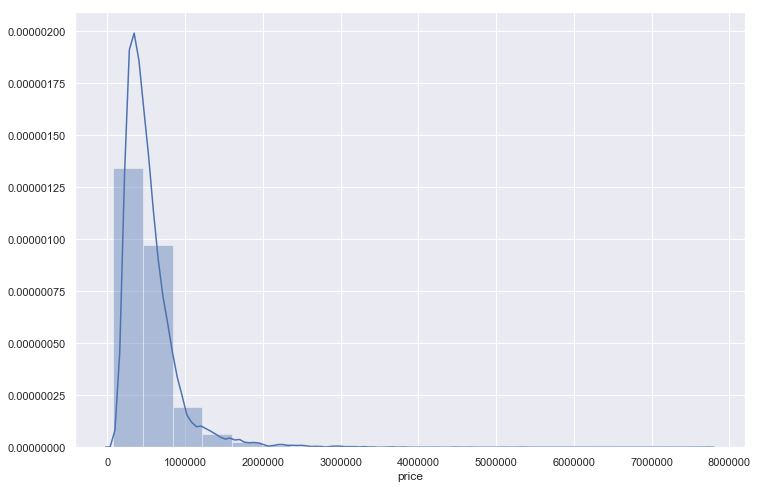

In [17]:
plot_hist('price', df_cleaned)

* We can clearly see a very long right tail.  This means that there are very few expensive houses in our dataframe.  

In [29]:
cut_off_price = 1000000
(len(df[df['price']>cut_off_price]))/(len(df['price']))*100

6.750937630226421

In [28]:
df_cleaned = df_cleaned[df_cleaned['price']<cut_off_price]

* We decided to drop the data for houses above the $1 Million mark as only 6.75% of the properties were above that mark

Skewness: 0.620268
Kurtosis: -0.335502


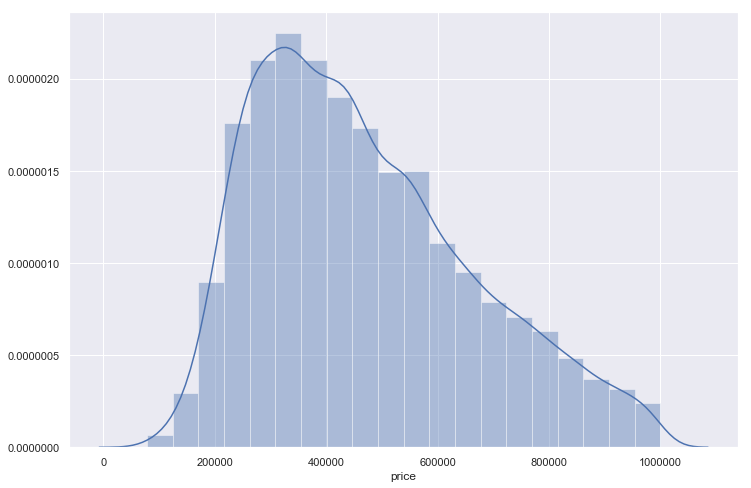

In [20]:
plot_hist('price', df_cleaned)

### Observations on 'price' variable, after expensive houses were dropped:

    1) The 'price' histogram data shows only a slight deviation from the normal distribution. 
  
    2) Has moderate positive skewness.
    
    3) Demonstrates peakedness.

## Distribution of independent variables

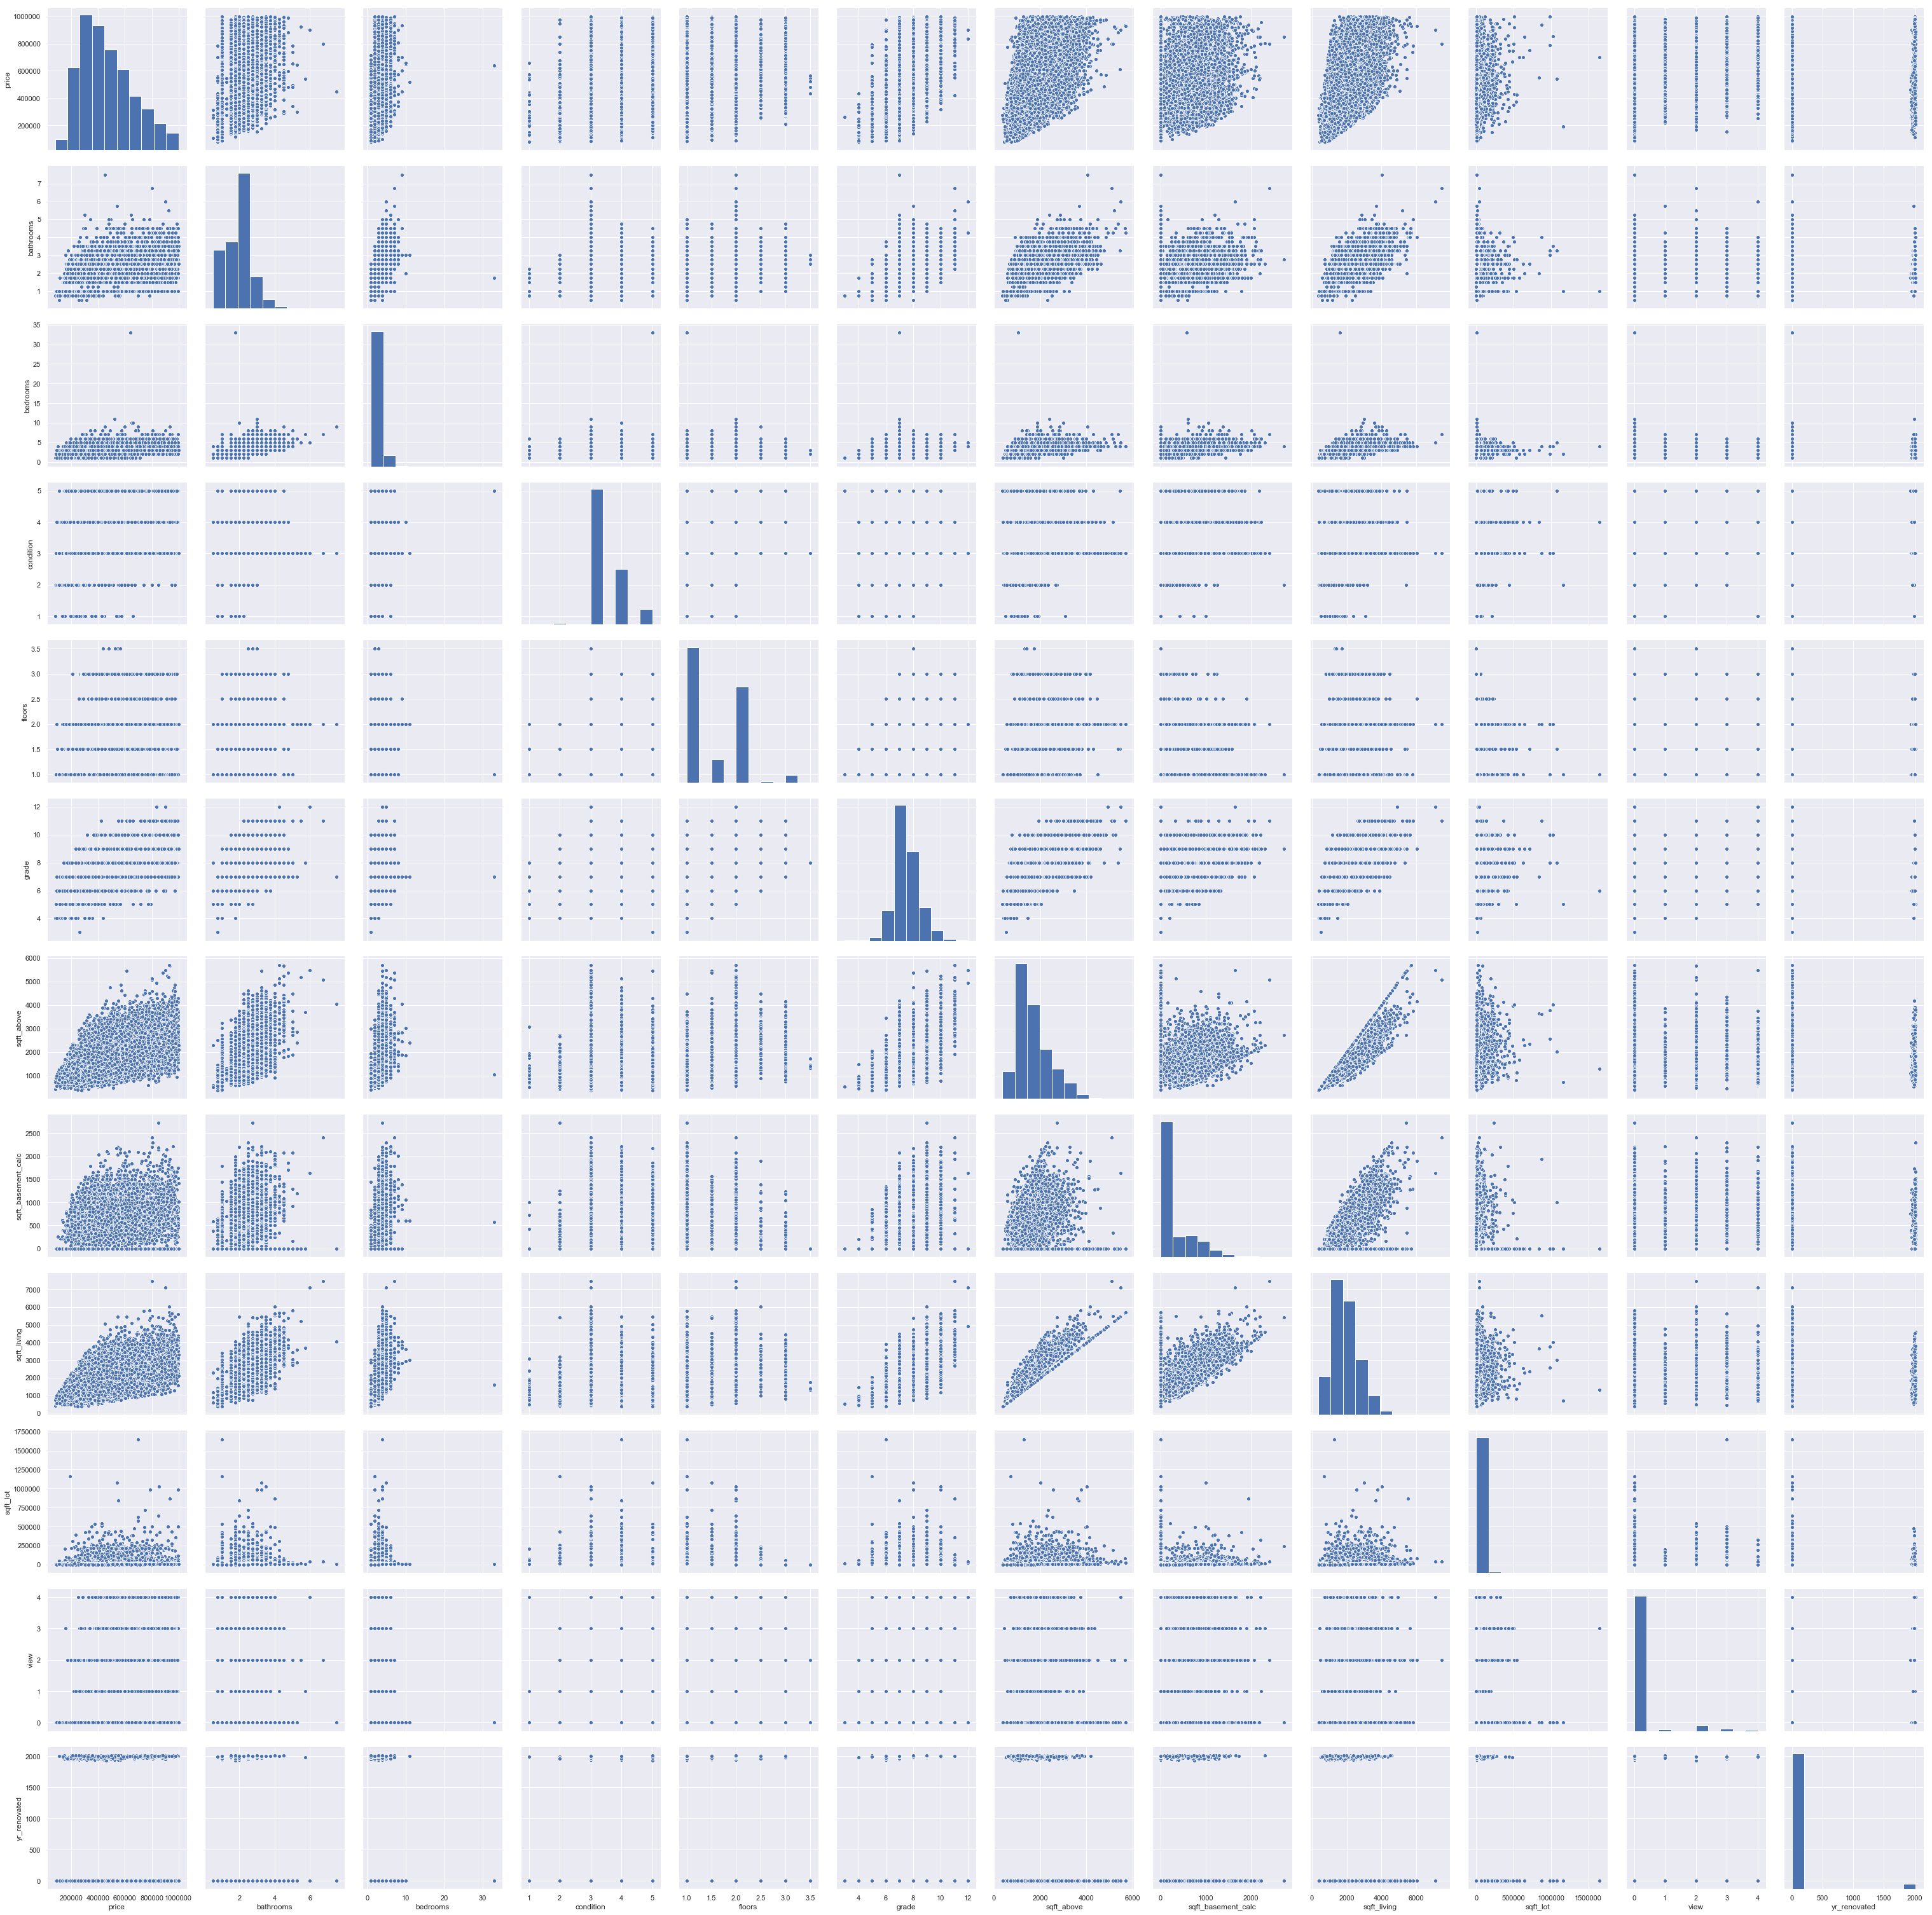

In [21]:
sns.set()
cols = ['price']
independent_variables = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement_calc', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'yr_renovated', 'view']
independent_variables.sort()
cols.extend(independent_variables)
sns.pairplot(df_cleaned[cols], size = 3.5)
plt.show();

### Independent variables to look at for Homoscedasticity:
    i.e. the variance remains consistent
    1) 'sqft_living'
    2) 'sqft_above'

#### 'sqft_living'

Skewness: 0.802525
Kurtosis: 0.874205


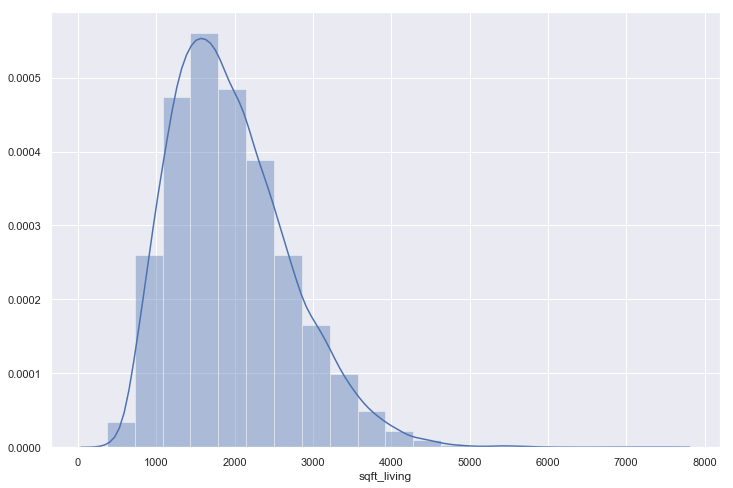

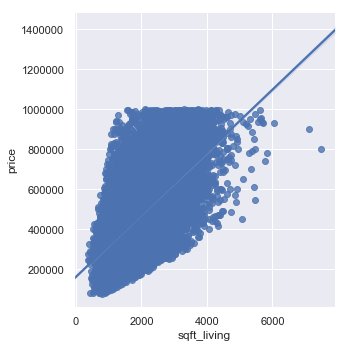

In [22]:
plot_hist('sqft_living', df_cleaned)
plot_scatter('sqft_living', df_cleaned)

#### 'sqft_above'

Skewness: 1.065632
Kurtosis: 0.912029


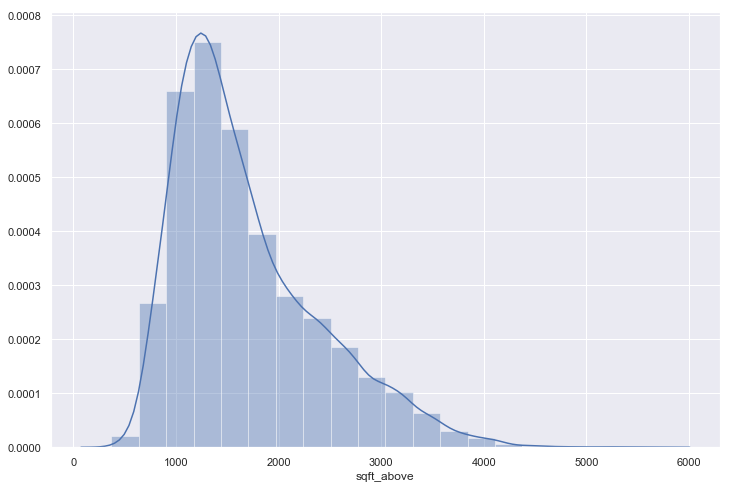

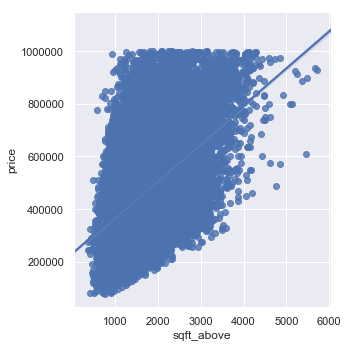

In [23]:
plot_hist('sqft_above', df_cleaned)
plot_scatter('sqft_above', df_cleaned)

    * We can see that 'sqft_above' is heteroscedastic

# Feature Engineering

#### 'waterfront'

In [24]:
len(df_cleaned[df_cleaned['waterfront']>0])

49

In [25]:
df_cleaned['waterfront'] = df_cleaned['waterfront'].replace(np.nan,2)

In [26]:
df_cleaned['waterfront'].value_counts()

0.0    17683
2.0     2204
1.0       49
Name: waterfront, dtype: int64

* Only 146 waterfront properties
* NaN values have been given a value of 2

#### 'yr_renovated'

In [27]:
len(df_cleaned[df_cleaned['yr_renovated']>0])

594

* Only 594 properties had a recorded renovation

#### 'has_basement'

In [38]:
df_cleaned['has_basement'] = df_cleaned['sqft_basement_calc']>0

# Predictive Modeling

### "How Can Homeowners Improve The Selling Price of their Home?"
####  In order to answer this question, we first categorized the variables in our dataset into two categories: 

#### Uncontrollable: factors which are beyond the homeowners' control
    - Geographic: latitude, longitude, zipcode, sqft_living15, sqft_lot15, waterfront

#### Controllable: factors which homeowners conceivably have the opportunity to improve upon
    - Size: sqft_basement, sqft_above, sqft_living, sqft_lot
    - Amenities: bathrooms, bedrooms, floors
    - Upkeep: grade, condition, yr_renovated
    
#### We decided to focus the model on the 'Controllable' variables

## Baseline Model

In [32]:
#calculating baseline model R^2 = 0.0

df_cleaned['price_pred'] = df_cleaned['price'].mean()
sk.metrics.r2_score(df_cleaned['price'],df_cleaned['price_pred'])

0.0

In [33]:
X0 = df_cleaned[['price_pred']]
y0 = df_cleaned[['price']]
model0 = sm.OLS(y0, X0).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Fri, 10 May 2019   Prob (F-statistic):                nan
Time:                        14:06:12   Log-Likelihood:            -2.7113e+05
No. Observations:               19936   AIC:                         5.423e+05
Df Residuals:                   19935   BIC:                         5.423e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price_pred     1.0000      0.003    339.069      0.000       0.994       1.006
==============================================================================
Omnibus:                     1225.371   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1371.768
Skew:                           0.620   Prob(JB):                    1.33e-298
Kurtosis:                       2.664   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Training and Testing in Ridge

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
lr = LinearRegression()

In [57]:
df_cleaned_model1 = df_cleaned[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_above', 'has_basement']].copy()
# 'yr_renovated' hasnt been fixed, so cant add

In [58]:
X = df_cleaned_model1.iloc[:,1:len(df_cleaned_model1)]
# X = df_cleaned_model1[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade','sqft_above', 'has_basement']]
y = df_cleaned_model1['price']


In [70]:
#setting up the train/test splits for cross-validating our model

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(len(X_train), len(X_test),len(y_train), len(y_test))

15948 3988 15948 3988


In [71]:
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [72]:
rr = Ridge(alpha=0.05) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
rr100 = Ridge(alpha=1) # restricted and in this case linear and ridge regression resembles
# train_score=lr.score(X_train_scaled, y_train)
# test_score=lr.score(X_test_scaled, y_test)
rr.fit(X_train_scaled, y_train)
rr100.fit(X_train_scaled, y_train)

Ridge_train_score = rr.score(X_train_scaled,y_train)
Ridge_test_score = rr.score(X_test_scaled, y_test)

Ridge_train_score100 = rr100.score(X_train_scaled,y_train)
Ridge_test_score100 = rr100.score(X_test_scaled, y_test)

print(Ridge_train_score)
print(Ridge_test_score)

print(Ridge_train_score100)
print(Ridge_test_score100)

0.4701586661553862
0.4685109767310867
0.47015866252758803
0.46851081450241966


In [76]:
coefs_df = pd.DataFrame(list(zip(rr.coef_, df_cleaned_model1.columns[1:])))

In [ ]:
rr.

In [77]:
coefs_df

,0,1
0,-9262.524092,bedrooms
1,-17390.297595,bathrooms
2,59876.597115,sqft_living
3,1391.323513,sqft_lot
4,13659.684484,floors
5,25294.783168,condition
6,80394.263029,grade
7,13696.557765,sqft_above
8,28896.414093,has_basement


In [78]:
#creating a dataframe with the coefficient weights
model1_summary = pd.DataFrame(coefs_df)

In [79]:
#printing the interpretable coefficients
print(-10443.66/np.std(df_cleaned['bedrooms']))
print(-16830.13/np.std(df_cleaned['bathrooms']))
print(63235.22/np.std(df_cleaned['sqft_living']))
print(2392.59/np.std(df_cleaned['sqft_lot']))
print(12151.70/np.std(df_cleaned['floors']))
print(24669.52/np.std(df_cleaned['condition']))
print(81374.46/np.std(df_cleaned['grade']))
print(11848.83/np.std(df_cleaned['sqft_above']))
print(28118.60/np.std(df_cleaned['has_basement']))

-11528.823162354982
-23994.73016013802
83.70804340611028
0.059625872771336616
22644.7159686995
38258.35499064089
80545.16913764921
16.649597385063778
58029.13215438157


In [80]:
model1_summary['coeff_real'] = [-11834.094524967157, -23975.577055744252, 83.77369999328725, 0.059834122259603745, 22664.55703672976, 38236.476339610264, 80458.77405686761, 16.666281085354235, 58035.260809030966]


In [81]:
model1_summary

,0,1,coeff_real
0,-9262.524092,bedrooms,-11834.094525
1,-17390.297595,bathrooms,-23975.577056
2,59876.597115,sqft_living,83.773700
3,1391.323513,sqft_lot,0.059834
4,13659.684484,floors,22664.557037
5,25294.783168,condition,38236.476340
6,80394.263029,grade,80458.774057
7,13696.557765,sqft_above,16.666281
8,28896.414093,has_basement,58035.260809


## Mean-Squared Errors (MSE)

In [82]:
#Calculate the residuals and the mean squared error
from sklearn.metrics import mean_squared_error

test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)**0.5
test_mse  
#test_mse results indicate our residuals are, on average.....


#Residual Plot:
#qq plots show 
residuals = model.resid
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()

#new block
residuals.hist(bins=200)

NameError: name 'y_hat_test' is not defined

## Summary of Findings

Our model suggests that the most important thing homeowners can do to increase their sale price is to invest in home improvement (e.g., a fresh coat of paint or home repairs).  

### - Limitations and Next Steps:

    * Limited to houses below $1 Million
      
          We have chosen to focus our analysis on a subset of the full range of houses in King County (less than $1
      million sale price) in order to meet the assumptions of conducting a linear regression. Our initial 
      investigation showed that there was not the same pattern of relationships between houses above and 
      below $1 million.
     
    * Model does not include uncontrollable variables
    
          The accuracy of our model could vary depending on geographic factors or other uncontrollable factors
          that we haven't yet controlled for in our analysis (e.g., zipcode, year built).
    

# Data Visualization